# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [195]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [196]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [197]:
# Import the necessary CSVs to Pandas DataFrames
# YOUR CODE HERE!
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [198]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # YOUR CODE HERE!
    sfo_data_units=sfo_data.drop(['sale_price_sqr_foot', 'gross_rent'], axis=1)
    sfo_data_units=sfo_data_units.groupby('year').mean()
    ax = sfo_data_units.plot.bar(y = "housing_units")
    ax.set_ylim([350000, 400000])
    return(ax)


In [199]:
def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!
    sfo_rent_costs=sfo_data.drop(['neighborhood', 'housing_units', 'sale_price_sqr_foot'], axis=1)
    sfo_rent_costs=sfo_rent_costs.groupby('year').mean()
    cx = sfo_rent_costs.plot.line(y = "gross_rent")
    
    return(cx)
    

In [200]:
def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!
    sfo_sales_costs=sfo_data.drop(['neighborhood', 'housing_units', 'gross_rent'], axis=1)
    sfo_sales_costs=sfo_sales_costs.groupby('year').mean().round(2)
    bx = sfo_sales_costs.plot.line(y = "sale_price_sqr_foot")
    return(bx)


In [201]:
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
    sfo_data_hood=sfo_data.reset_index()
    sfo_data_hood=sfo_data_hood.drop('housing_units', axis=1)
    sfo_data_hood=sfo_data_hood.groupby(['year', 'neighborhood']).mean()
    sfo_data_hood = sfo_data_hood.hvplot.line('year','sale_price_sqr_foot', groupby='neighborhood')
    return(sfo_data_hood)


In [202]:
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    # YOUR CODE HERE!
    sfo_data_expense = sfo_data.groupby('neighborhood')['sale_price_sqr_foot'].mean()

    sfo_data_expense_10=sfo_data_expense.sort_values(ascending=False)
    sfo_data_expense_10= sfo_data_expense_10.iloc[:10]
    sfo_data_expense_10= sfo_data_expense_10.reset_index()
    sfo_data_expense_10= sfo_data_expense_10.plot.bar(x='neighborhood')
    return(sfo_data_expense_10)


In [203]:
def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    # YOUR CODE HERE!
    sfo_data_avg = sfo_data.groupby('neighborhood')['sale_price_sqr_foot', 'gross_rent', 'housing_units'].mean().round(2)
   
    sfo_comb_data_avg = sfo_data_avg.drop("housing_units", axis=1)
    sfo_comb_data_avg=sfo_comb_data_avg.sort_values(by="sale_price_sqr_foot", ascending=False)

    sfo_comb_data_avg = sfo_comb_data_avg.iloc[:10]
    
    sfo_comb_data_avg = sfo_comb_data_avg.hvplot.scatter(x='gross_rent', y='sale_price_sqr_foot', hover_cols=['neighborhood'])
    return(sfo_comb_data_avg)


In [204]:
    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    # YOUR CODE HERE!
    sfo_sale_costs = sfo_data.groupby(['year','neighborhood', 'gross_rent', 'housing_units'])['sale_price_sqr_foot'].max().round(2)

    sfo_sale_expense=sfo_sale_costs.sort_values(ascending=False)
    sfo_sale_expense= sfo_sale_expense.iloc[:20].reset_index()
    sfo_sale_expense
    
    parallel_coordinates_info= px.parallel_coordinates(sfo_sale_expense, color='year') 
    return(parallel_coordinates_info)

    

In [205]:
def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!
    sfo_sale_costs = sfo_data.groupby(['year','neighborhood', 'gross_rent', 'housing_units'])['sale_price_sqr_foot'].max().round(2)

    sfo_sale_expense=sfo_sale_costs.sort_values(ascending=False)
    sfo_sale_expense= sfo_sale_expense.iloc[:20].reset_index()
    sfo_sale_expense
    
    parallel_categories_info =px.parallel_categories(sfo_sale_expense, color="year")
    return (parallel_categories_info)



In [206]:
def neighborhood_map():
    """Neighborhood Map."""

    # YOUR CODE HERE!
    file_path = Path("Data/neighborhoods_coordinates.csv")
    sfo_coordinates = pd.read_csv(file_path)
    sfo_coordinates = sfo_coordinates.rename(columns={"Neighborhood":"neighborhood"})
    sfo_coordinates = sfo_coordinates.set_index("neighborhood")
    sfo_data_avg = sfo_data.groupby('neighborhood')['sale_price_sqr_foot', 'gross_rent', 'housing_units'].mean().round(2)
    join = sfo_data_avg.join(sfo_coordinates)
    map_box_api = os.getenv("mapbox")

    px.set_mapbox_access_token(map_box_api)


    map_1 = px.scatter_mapbox(
        join,
        title="Neighborhood Data",
        lat="Lat",
        lon="Lon",
        color="housing_units",
        hover_name = join.index,
        hover_data = ["gross_rent","sale_price_sqr_foot"]
    

    )
    return(map_1)



In [207]:
def sunburst():
    """Sunburst Plot."""
    sfo_sale_costs = sfo_data.groupby(['year','neighborhood', 'gross_rent', 'housing_units'])['sale_price_sqr_foot'].max().round(2)

    sfo_sale_expense=sfo_sale_costs.sort_values(ascending=False)
    sfo_sale_expense= sfo_sale_expense.iloc[:20].reset_index()
    sfo_sale_expense
    sunburst_info= px.sunburst(sfo_sale_expense, path = ['year','neighborhood'],values="sale_price_sqr_foot")
    return(sunburst_info)

    

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [208]:
# Create a Title for the Dashboard
# YOUR CODE HERE!
title = "SF Real Estate Dashboard"

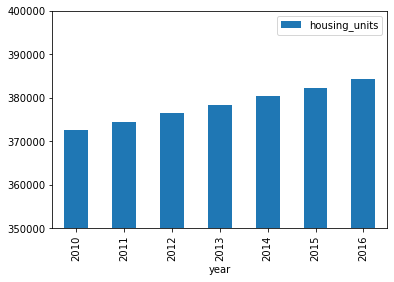

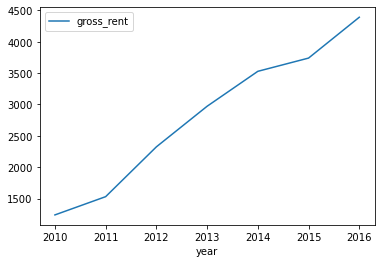

In [209]:
# Create a tab layout for the dashboard
# YOUR CODE HERE!
row_of_data = pn.Row(housing_units_per_year, average_gross_rent, average_sales_price)


In [210]:
row_of_parallel = pn.Row(parallel_categories, parallel_coordinates)


In [211]:
row_of_neighborhoods = pn.Row(average_price_by_neighborhood, top_most_expensive_neighborhoods, most_expensive_neighborhoods_rent_sales)


/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [212]:
row_of_map= pn.Row(neighborhood_map)


/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [213]:
plots_as_column=pn.Column("#San Francisco Real Estate market", row_of_data, row_of_parallel, row_of_rest, row_of_map)


In [214]:
tabs = pn.Tabs(
    ("All Plots", plots_as_column),
    ("Data Plots", row_of_data),
    ("Statistical Plots", row_of_parallel),
    ("Maps", row_of_map),
    ("Neighborhood Data", row_of_neighborhoods)
)


In [215]:
# Create the dashboard
# YOUR CODE HERE!
tabs

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Column
                [0] Column()
                [1] Row
                    [0] Str(AxesSubplot, name='interactive09561')
            [1] Column
                [0] Column()
                [1] Row
                    [0] Str(AxesSubplot, name='interactive09567')
            [2] Column
                [0] Column()
                [1] Row
                    [0] Str(AxesSubplot, name='interactive09573')
        [2] Row
            [0] Column
                [0] Column()
                [1] Row
                    [0] Plotly(Figure, name='interactive09580')
            [1] Column
                [0] Column()
                [1] Row
                    [0] Plotly(Figure, name='interactive09586')
        [3] Row
            [0] Column
                [0] Column()
                [1] Row
                    [0] Row(name='interactive07766')
                        [0] HoloViews(DynamicMap, name='interactive07766')
                        [1] Column
                            [0] WidgetBox
                                [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                            [1] VSpacer()
            [1] Column
                [0] Column()
                [1] Row
                    [0] Str(AxesSubplot, name='interactive07802')
            [2] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(Scatter, name='interactive07808')
        [4] Row
            [0] Column
                [0] Column()
                [1] Row
                    [0] Plotly(Figure, name='interactive09720')
    [1] Row
        [0] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive09561')
        [1] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive09567')
        [2] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive09573')
    [2] Row
        [0] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive09580')
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive09586')
    [3] Row
        [0] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive09720')
    [4] Row
        [0] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive09593')
                    [0] HoloViews(DynamicMap, name='interactive09593')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                        [1] VSpacer()
        [1] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive09629')
        [2] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Scatter, name='interactive09635')

## Serve the Panel Dashboard

In [216]:
# Serve the# dashboard
# YOUR CODE HERE!

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

<AxesSubplot:xlabel='year'>

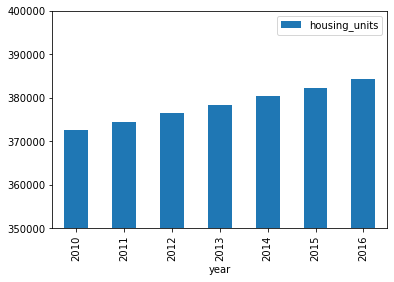

In [217]:
housing_units_per_year()

<AxesSubplot:xlabel='year'>

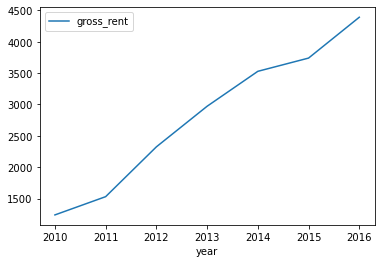

In [218]:
average_gross_rent()

<AxesSubplot:xlabel='year'>

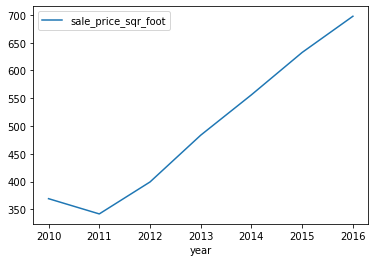

In [219]:
average_sales_price()

In [220]:
average_price_by_neighborhood()

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

<AxesSubplot:xlabel='neighborhood'>

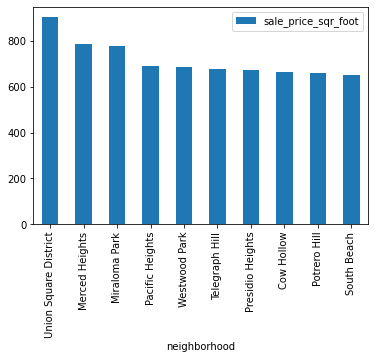

In [221]:
top_most_expensive_neighborhoods()

In [222]:
most_expensive_neighborhoods_rent_sales()

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



:Scatter   [gross_rent]   (sale_price_sqr_foot,neighborhood)

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



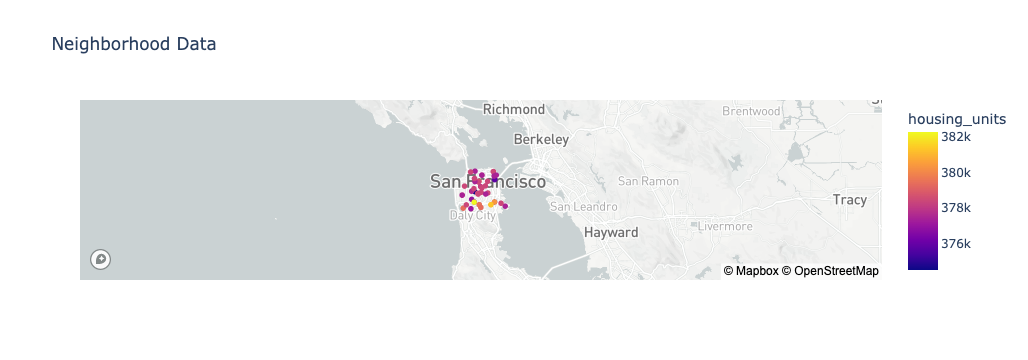

In [223]:
neighborhood_map().show()

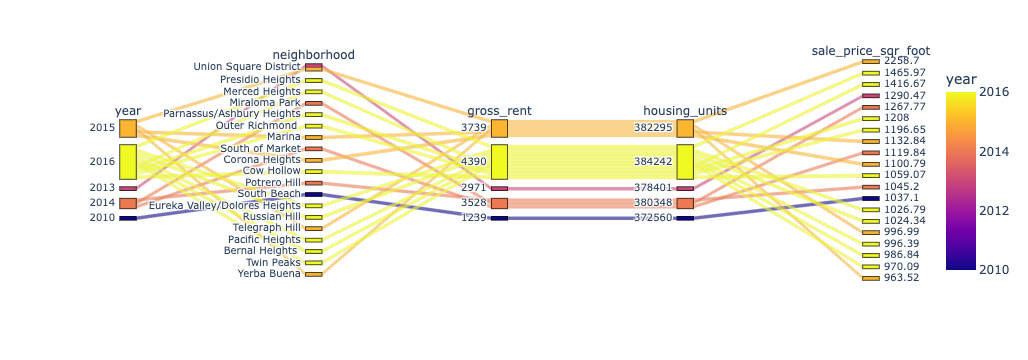

In [224]:
parallel_categories()

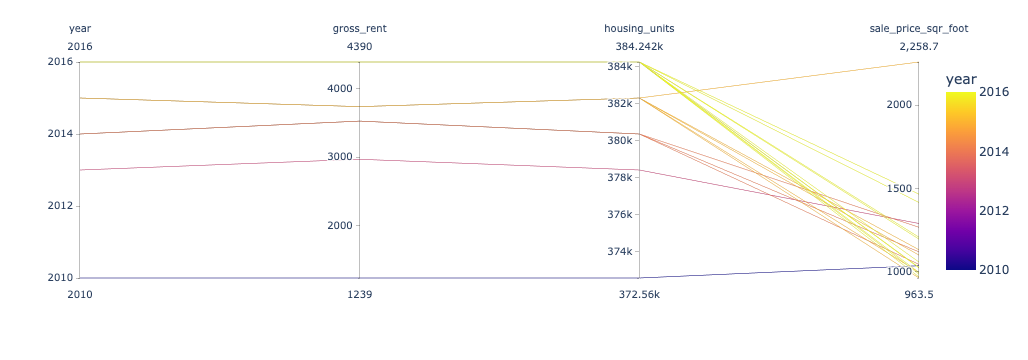

In [225]:
parallel_coordinates()

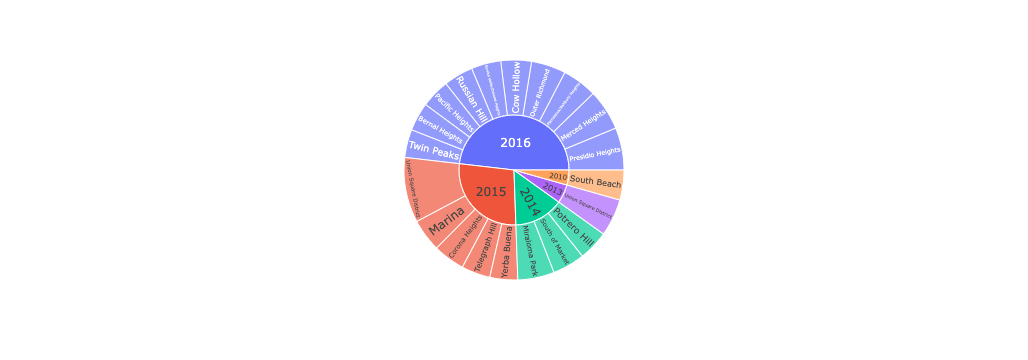

In [226]:
sunburst()